<a href="https://colab.research.google.com/github/vinicius-mattoso/Maintenance_study/blob/main/PCA_EXAMPLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/machine-predictive-maintenance-classification")

print("Path to dataset files:", path)

100%|██████████| 137k/137k [00:00<00:00, 49.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/machine-predictive-maintenance-classification/versions/1


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Caminho baixado pelo kagglehub
df = pd.read_csv(f"{path}/predictive_maintenance.csv")  # ajustar nome do CSV se necessário
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [7]:
list_of_columns = df.columns.to_list()
print(list_of_columns)

['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type']


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Estatísticas gerais
print(df.describe())#.T)

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25

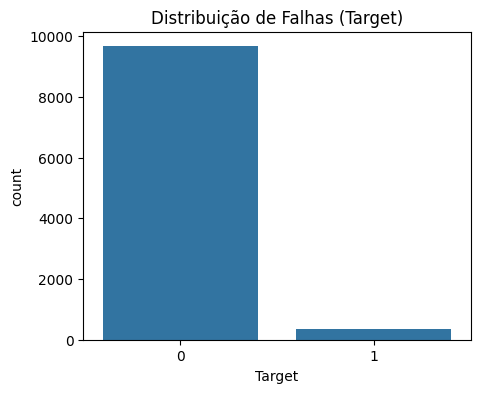

In [12]:
# Balanceamento da variável-alvo
plt.figure(figsize=(5,4))
sns.countplot(x='Target', data=df)
plt.title('Distribuição de Falhas (Target)')
plt.show()

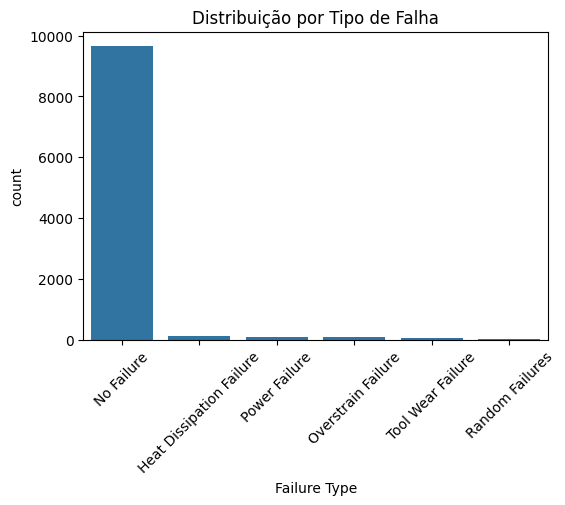

In [13]:
# Tipos de falha
plt.figure(figsize=(6,4))
sns.countplot(x='Failure Type', data=df, order=df['Failure Type'].value_counts().index)
plt.title('Distribuição por Tipo de Falha')
plt.xticks(rotation=45)
plt.show()

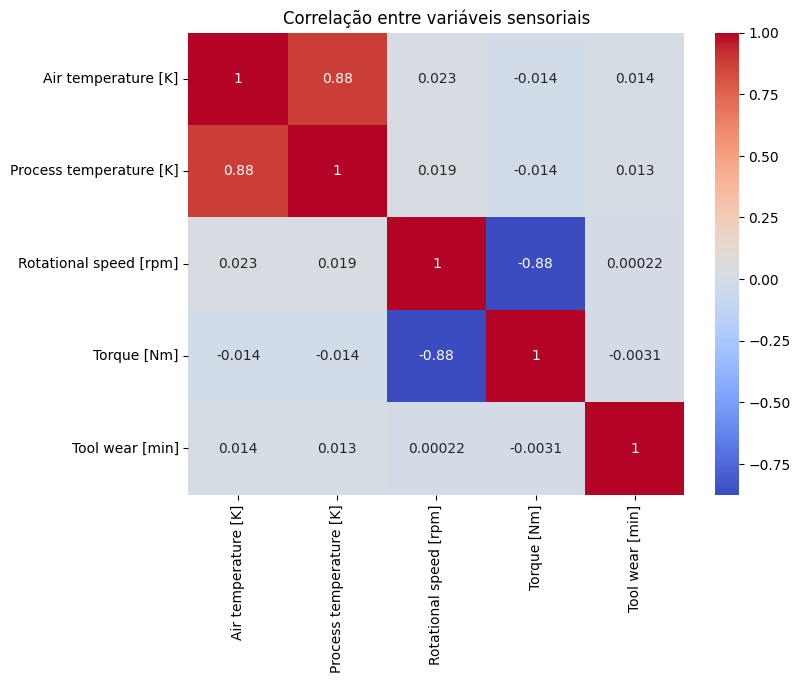

In [17]:
# Correlação entre variáveis numéricas
num_cols = ['Air temperature [K]', 'Process temperature [K]',	'Rotational speed [rpm]',	'Torque [Nm]',	'Tool wear [min]']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis sensoriais')
plt.show()

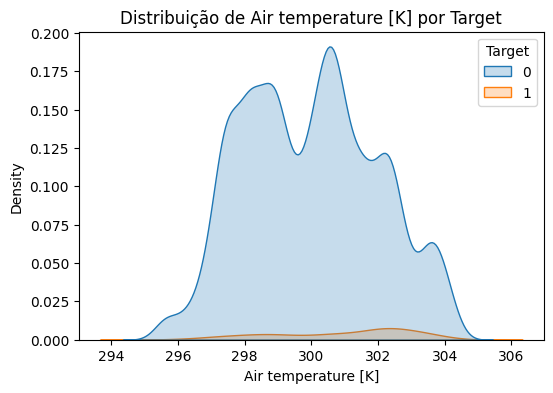

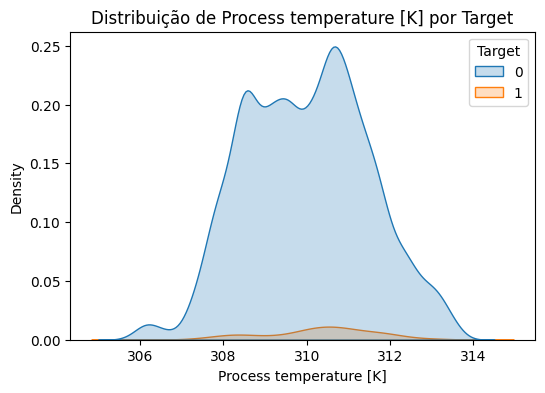

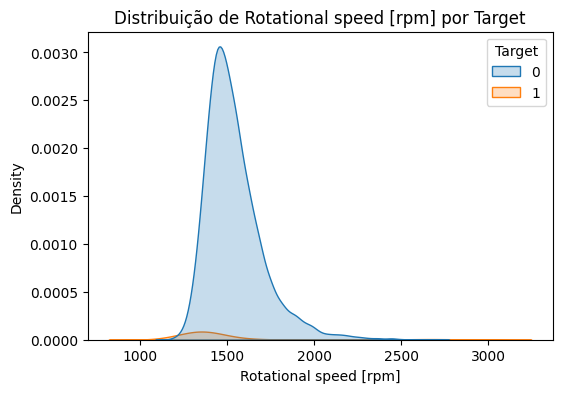

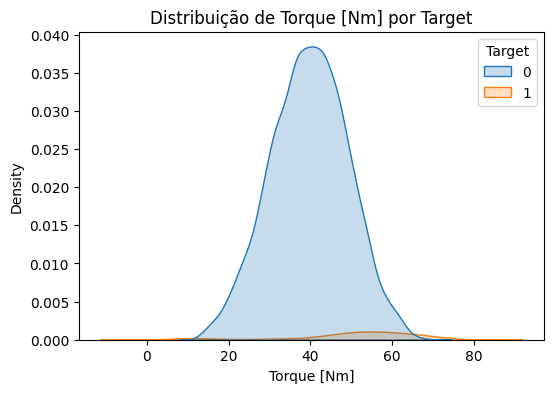

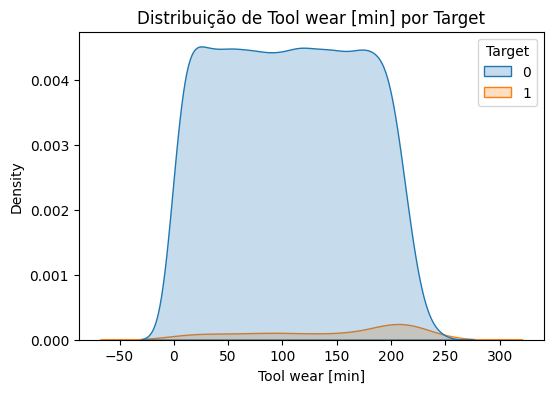

In [18]:
# Distribuições por classe
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue='Target', fill=True)
    plt.title(f'Distribuição de {col} por Target')
    plt.show()

In [20]:
# Features numéricas relevantes para o PCA
numeric_features = list_of_columns[3:-2]

X = df[numeric_features]
y = df['Target']  # ou 'machine failure' se for o nome real


In [21]:
print(X)

      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                    1551   
1                   298.2                    308.7                    1408   
2                   298.1                    308.5                    1498   
3                   298.2                    308.6                    1433   
4                   298.2                    308.7                    1408   
...                   ...                      ...                     ...   
9995                298.8                    308.4                    1604   
9996                298.9                    308.4                    1632   
9997                299.0                    308.6                    1645   
9998                299.0                    308.7                    1408   
9999                299.0                    308.7                    1500   

      Torque [Nm]  Tool wear [min]  
0            42.8         

In [22]:
from sklearn.model_selection import train_test_split

# Split inicial (com todas as classes)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## No treino, separar dados normais e anômalos

* Ajuste do PCA: apenas com y == 0 do treino.

* Validação interna: aplicar nos dados anômalos do treino para ver sensibilidade.

In [23]:
# Apenas normais do treino para ajuste do PCA
X_train_norm = X_train_full[y_train_full == 0]

# Dados anômalos do treino para validação interna
X_train_anom = X_train_full[y_train_full == 1]

In [34]:
from sklearn.metrics import roc_curve

y_true = np.concatenate([np.zeros(len(train_error)), np.ones(len(anom_error))])
errors = np.concatenate([train_error, anom_error])

fpr, tpr, thresholds = roc_curve(y_true, errors)
j_scores = tpr - fpr
best_threshold = thresholds[j_scores.argmax()]

print("Melhor threshold:", best_threshold)
threshold = best_threshold

Melhor threshold: 0.051968089406120535


### Treinar o PCA

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Normalizar
scaler = StandardScaler()
X_train_norm_scaled = scaler.fit_transform(X_train_norm)

# PCA ajustado só com normais
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_norm_scaled)
X_train_reconstructed = pca.inverse_transform(X_train_pca)

# Erro e threshold
train_error = np.mean((X_train_norm_scaled - X_train_reconstructed)**2, axis=1)
threshold = np.percentile(train_error, 85)

### Validação interna (no conjunto de treino)

* Testar em X_train_anom para ver se o modelo detecta bem falhas já conhecidas.

In [40]:
X_train_anom_scaled = scaler.transform(X_train_anom)
X_train_anom_pca = pca.transform(X_train_anom_scaled)
X_train_anom_reconstructed = pca.inverse_transform(X_train_anom_pca)
anom_error = np.mean((X_train_anom_scaled - X_train_anom_reconstructed)**2, axis=1)

# Classificação binária
y_train_pred = (anom_error > threshold).astype(int)

In [41]:
# Verdadeiro: todos 1
y_true_train_anom = np.ones(len(X_train_anom))

# Métricas
acertos = np.sum(y_train_pred == y_true_train_anom)
taxa_acerto = acertos / len(y_true_train_anom)

print(f"Acertos: {acertos} de {len(y_true_train_anom)}")
print(f"Recall (sensibilidade) nos anômalos do treino: {taxa_acerto:.2%}")

Acertos: 163 de 271
Recall (sensibilidade) nos anômalos do treino: 60.15%


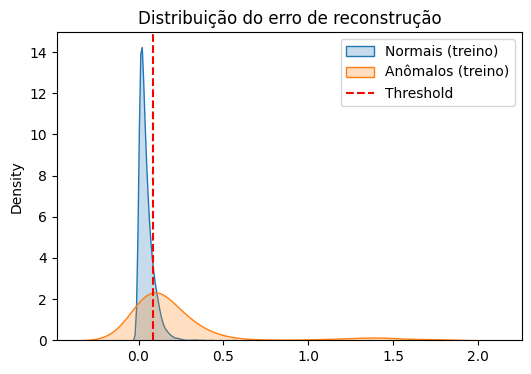

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.kdeplot(train_error, label="Normais (treino)", fill=True)
sns.kdeplot(anom_error, label="Anômalos (treino)", fill=True)
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.title("Distribuição do erro de reconstrução")
plt.show()

### Dados de Teste Real

In [43]:
X_test_scaled = scaler.transform(X_test_full)
X_test_pca = pca.transform(X_test_scaled)
X_test_reconstructed = pca.inverse_transform(X_test_pca)
test_error = np.mean((X_test_scaled - X_test_reconstructed)**2, axis=1)

y_test_pred = (test_error > threshold).astype(int)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("\nValidação Real:")
print(classification_report(y_test_full, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test_full, test_error))


Validação Real:
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      1932
           1       0.11      0.51      0.18        68

    accuracy                           0.84      2000
   macro avg       0.55      0.68      0.55      2000
weighted avg       0.95      0.84      0.89      2000

ROC AUC: 0.8077807209840457
